# Bike Sharing Assignment

## Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. The company wants to understand how exactly the demands vary with different features. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing dataset
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Reading and Understanding Data

In [4]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_sharing.shape

(730, 16)

We can see that the data does not have any null values, so we do not have to deal with missing values.

In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping unnecessary columns
The columns that can be dropped are:
1. Instant - as this column just represents the index of the records.
2. dteday - as we will not create a Linear Regression Model based on Time Series. 
2. Casual and Registered - as adding up the values of these two columns is equal to the values of the 'cnt' column.

In [7]:
bike_sharing = bike_sharing.drop(['instant','dteday','casual','registered'],axis = 1)

In [8]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Identifying the Continuous and Categorical Variables

In [9]:
# Using the value_counts() to check the no. of unique values
bike_sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

Clearly, the columns **_season , yr, mnth, holiday, weekday, workingday, & weathersit_** are categorical variables and the rest of them are continuous variables.

In [10]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We can see that all the categorical variables belong to int data type, so we need to convert the Categorical variables to _'object'_ data type.

In [11]:
# Coverting Categorical variables to Object data type
bike_sharing['season'] = bike_sharing['season'].astype(object)
bike_sharing['mnth'] = bike_sharing['mnth'].astype(object)
bike_sharing['weekday'] = bike_sharing['weekday'].astype(object)
bike_sharing['weathersit'] = bike_sharing['weathersit'].astype(object)

In [12]:
# Checking if the data types of the variables have been converted to Object dtype
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Data Visualization

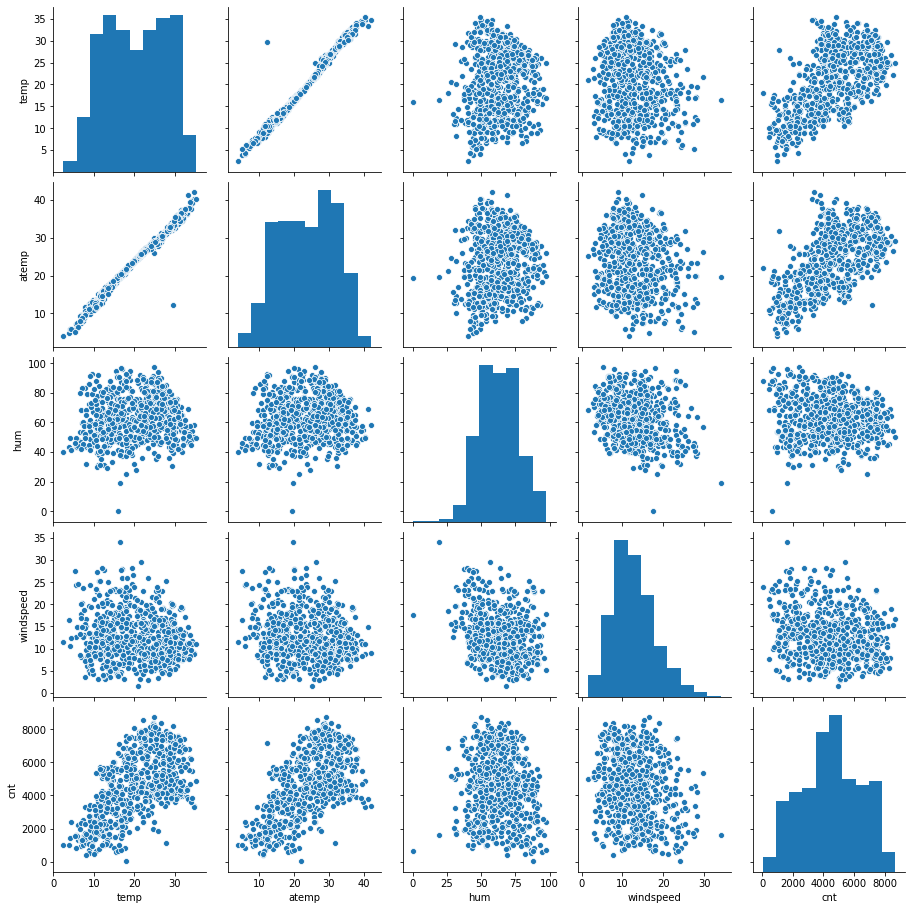

In [13]:
# Pairplot of numerical variables

sns.pairplot(data=bike_sharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

> It looks like the variables 'temp' and 'atemp' are highly correlated, lets check this by plotting a heatmap.

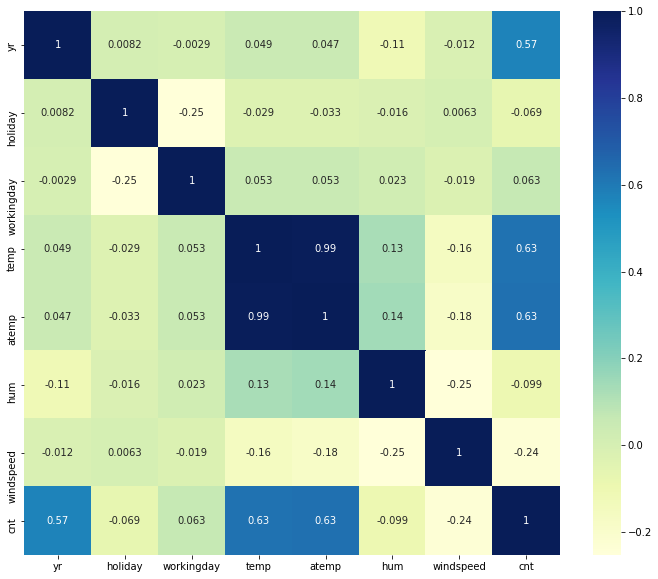

In [14]:
plt.figure(figsize = (12,10))
sns.heatmap(bike_sharing.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

We can see that the variables, 'atemp' & 'temp' are highly correlated.
We know that the Target variable is **'cnt'** variable and the rest of the variables are Independent variables. Hence, correlation between the independent variables would mean Multicollinearity and building a model including these variables would affect the inference. 
> So, lets drop the variable 'atemp' as it is the feeling temperature which is equivalent to 'temp'. 

In [15]:
# Dropping the column, 'atemp'
bike_sharing = bike_sharing.drop(['atemp'], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


We know that our target variable is 'cnt', so lets plot categorical variables using the target variable.

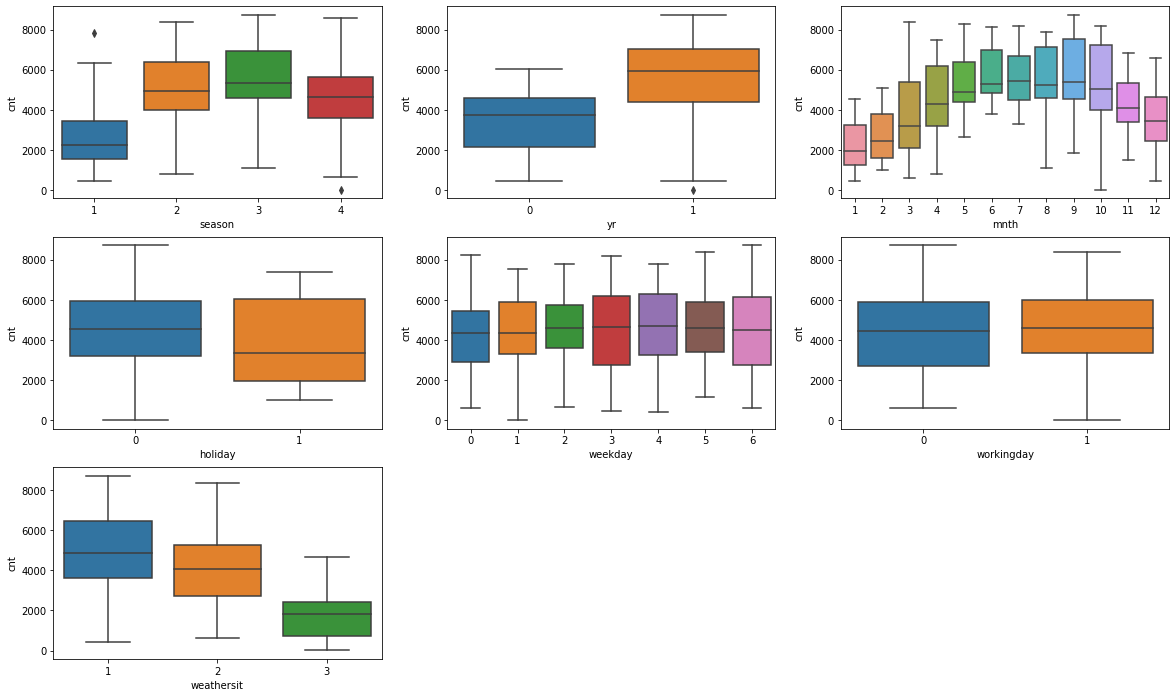

In [16]:
# Plotting Categorical Variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()

## Data Preparation

In [17]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


Since, the numeric values in the variables - season, mnth, weekday, & weathersit have specific labels associated with them, we need to convert these feature values into categorical string values.

In [18]:
# Converting the numeric values in the variables to their specific labels

season = {1:"spring", 2:"summer", 3:'fall', 4:"winter"}
month = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
week = {0:"Tue", 1:"Wed", 2:"Thu", 3:"Fri", 4:"Sat", 5:"Sun", 6:"Mon"}
weather = {1:"Clear", 2:'Mist', 3:"Rain"}

bike_sharing['season'] = bike_sharing['season'].apply(lambda x: season[x])
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x: month[x])
bike_sharing['weekday'] = bike_sharing['weekday'].apply(lambda x: week[x])
bike_sharing['weathersit'] = bike_sharing['weathersit'].apply(lambda x: weather[x])

In [19]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

Now, we need to create dummy variables for these columns, as we need numeric values to fit a regression line.  

In [20]:
# Creating a dataframe with dummy variables for the categorical variable - Season
seasons = pd.get_dummies(bike_sharing['season'], drop_first = True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# Adding this dataframe to the bike_sharing dataframe
bike_sharing = pd.concat([bike_sharing, seasons], axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [22]:
bike_sharing.drop(['season'], axis = 1, inplace = True)
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


Now, we need to continue this procedure of creating dummy variables for the variables - mnth, weekday and weathersit.

In [23]:
# Creating dummy variables
months = pd.get_dummies(bike_sharing['mnth'], drop_first = True)
weekdays = pd.get_dummies(bike_sharing['weekday'], drop_first = True)
weathersits = pd.get_dummies(bike_sharing['weathersit'], drop_first = True)

In [24]:
# Adding them in the orginal dataframe
bike_sharing = pd.concat([bike_sharing, months, weekdays, weathersits], axis = 1)
bike_sharing.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
0,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,1,0
1,0,Jan,0,Tue,0,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,1,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Dropping the columns for which the dummy variables have been created
bike_sharing.drop(['mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

## Splitting the Data into Train and Test Sets
As, one of the most important steps for regression is performing a train-test split.

In [27]:
# Importing the sklearnmodel and required class to perform the train-test split
from sklearn.model_selection import train_test_split

In [28]:
# Performing the train-test split
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Rescaling the Features
We need to rescale the variables so that they have a comparable scale.

In [31]:
# Rescaling the variables using MinMax Scaling method

from sklearn.preprocessing import MinMaxScaler #Importing the required libraries

In [32]:
scaler = MinMaxScaler()

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   cnt         510 non-null    int64  
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  Aug         510 non-null    uint8  
 11  Dec         510 non-null    uint8  
 12  Feb         510 non-null    uint8  
 13  Jan         510 non-null    uint8  
 14  Jul         510 non-null    uint8  
 15  Jun         510 non-null    uint8  
 16  Mar         510 non-null    uint8  
 17  May         510 non-null    uint8  
 18  Nov         510 non-null    uint8  
 19  Oct         510 non-null    

In [34]:
# Applying scaler() to all the variables except the 1-0 and dummy variables

num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing the Train data into X and Y sets to build the model

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    uint8  
 7   summer      510 non-null    uint8  
 8   winter      510 non-null    uint8  
 9   Aug         510 non-null    uint8  
 10  Dec         510 non-null    uint8  
 11  Feb         510 non-null    uint8  
 12  Jan         510 non-null    uint8  
 13  Jul         510 non-null    uint8  
 14  Jun         510 non-null    uint8  
 15  Mar         510 non-null    uint8  
 16  May         510 non-null    uint8  
 17  Nov         510 non-null    uint8  
 18  Oct         510 non-null    uint8  
 19  Sep         510 non-null    

# Building the Model

## RFE
Using Recursive Feature Elimination to select features

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', True, 1),
 ('Wed', False, 12),
 ('Mist', True, 1),
 ('Rain', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Mon', 'Tue', 'Mist', 'Rain'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sat',
       'Sun', 'Thu', 'Wed'],
      dtype='object')

## Building Model using statsmodel
We use statsmodel to get detailed statistics

In [46]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jul,Sep,Mon,Tue,Mist,Rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,1,0


In [48]:
# Adding a constant variable 
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train_rfe)

In [49]:
X_train_1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jul,Sep,Mon,Tue,Mist,Rain
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0


In [50]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  Jul         510 non-null    uint8  
 11  Sep         510 non-null    uint8  
 12  Mon         510 non-null    uint8  
 13  Tue         510 non-null    uint8  
 14  Mist        510 non-null    uint8  
 15  Rain        510 non-null    uint8  
dtypes: float64(4), int64(3), uint8(9)
memory usage: 36.4 KB


In [51]:
#Running the Linear Model
lr = sm.OLS(y_train, X_train_1).fit()

In [52]:
# Checking the parameters obtained
lr.params

const         0.198900
yr            0.229738
holiday      -0.018955
workingday    0.083695
temp          0.527819
hum          -0.159467
windspeed    -0.180601
spring       -0.055434
summer        0.052613
winter        0.100294
Jul          -0.054881
Sep           0.081773
Mon           0.093682
Tue           0.040479
Mist         -0.057847
Rain         -0.246332
dtype: float64

In [53]:
#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        19:33:40   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

We can see that, the variable **holiday** is insignificant in the presence of other variables, hence we can drop the column.

In [54]:
# Dropping the variables 'holiday'
X_train_2 = X_train_1.drop(['holiday'], axis = 1)

### Rebuilding the model without 'holiday'.

In [55]:
# Adding a constant
X_train_2 = sm.add_constant(X_train_2)

In [56]:
# Running the linear model
lr_2 = sm.OLS(y_train, X_train_2).fit()

#Checing the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.13e-191
Time:                        19:33:41   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

We can see all the variables have a low p-value but to be sure of non-multicollinearity, lets check the VIF.

### Checking VIF

In [57]:
#Importing the class and libraries required for checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
X_train_2 = X_train_2.drop(['const'], axis = 1)

In [59]:
# Creating a dataframe containing the names of all the features and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Mon,4.91
4,windspeed,4.90
5,spring,4.80
11,Tue,4.76
7,winter,3.71
6,summer,3.03
12,Mist,2.31


We can see that the variable 'hum' has a high VIF, so lets drop the variable and rebuild the model.

In [60]:
# Droping the variable 'hum'
X_train_3 = X_train_2.drop(['hum'], axis = 1)

### Rebuilding the model without 'hum'

In [61]:
# Adding a constant
X_train_3 = sm.add_constant(X_train_3)

# Running the linear model
lr_3 = sm.OLS(y_train, X_train_3).fit()

#Checking the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.73e-189
Time:                        19:33:41   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

### Checking VIF

In [62]:
# Creating a dataframe containing the names of all the features and their respective VIFs
X_train_3 = X_train_3.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,Mon,4.45
10,Tue,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,Jul,1.60


We can see that the variable 'workingday' has a high VIF, lets drop this variable

In [63]:
# Droping the variable 'workingday'
X_train_4 = X_train_3.drop(['workingday'], axis = 1)

### Rebuilding the model without 'workingday' variable

In [64]:
# Adding a constant
X_train_4 = sm.add_constant(X_train_4)

# Running the linear model
lr_4 = sm.OLS(y_train, X_train_4).fit()

#Checking the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.01e-186
Time:                        19:33:41   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

### Checking VIF

In [65]:
# Creating a dataframe containing the names of all the features and their respective VIFs
X_train_4 = X_train_4.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,summer,2.23
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,Jul,1.59
10,Mist,1.55
7,Sep,1.33
8,Mon,1.22


We can see that the variable 'temp' has a high VIF but the a low p-value and the variable 'Mon' has a high p-value and low VIF.
> Let's first drop the 'Mon', variable as it has a high p-value and then rebuild the model and check for VIF, as the variables which currently have a high VIF might get decreased.

In [66]:
X_train_5 = X_train_4.drop(['Mon'], axis = 1)

### Rebuilding the model without 'Mon' variable

In [67]:
# Adding a constant
X_train_5 = sm.add_constant(X_train_5)

# Running the linear model
lr_5 = sm.OLS(y_train, X_train_5).fit()

#Checking the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.65e-187
Time:                        19:33:41   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

### Checking VIF

In [68]:
X_train_5 = X_train_5.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
9,Mist,1.55
7,Sep,1.33
8,Tue,1.17


We can see that the variable 'temp' has still has a VIF > 5, lets drop it and rebuild the model.

In [69]:
X_train_6 = X_train_5.drop(['temp'], axis = 1)

### Rebuilding the model without 'temp' variable

In [70]:
# Adding a constant
X_train_6 = sm.add_constant(X_train_6)

# Running the linear model
lr_6 = sm.OLS(y_train, X_train_6).fit()

#Checking the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.10e-149
Time:                        19:33:41   Log-Likelihood:                 406.26
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     499   BIC:                            -743.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5889      0.017     34.820      0.0

### Checking VIF

In [71]:
X_train_6 = X_train_6.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.82
2,spring,2.08
3,summer,2.02
0,yr,1.83
4,winter,1.76
8,Mist,1.51
5,Jul,1.21
7,Tue,1.16
6,Sep,1.15
9,Rain,1.08


We can see that the variable `'Jul'`, has a very high p-value, hence we need to drop the variable and build a new model.

In [72]:
# Dropping the variable 'Jul'
X_train_final = X_train_6.drop(['Jul'], axis = 1)

### Rebuilding the linear model without 'Jul'

In [73]:
# Adding a constant
X_train_final = sm.add_constant(X_train_final)

# Running the linear model
lr_final = sm.OLS(y_train, X_train_final).fit()

#Checking the summary
lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.44e-150
Time:                        19:33:42   Log-Likelihood:                 406.18
No. Observations:                 510   AIC:                            -792.4
Df Residuals:                     500   BIC:                            -750.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5855      0.015     39.533      0.000       0.556       0.615
yr             0.2476      0.010     25.272      0.000       0.228       0.267
windspeed     -0.1724      0.030     -5.745      0.000      -0.231      -0.113
spring        -0.2988      0.015    -20.082      0.000      -0.328      -0.270
summer        -0.0417      0.015     -2.833      0.005      -0.071      -0.013
winter        -0.0752      0.014     -5.308      0.000      -0.103      -0.047
Sep            0.0704      0.019      3.635      0.000       0.032       0.108
Tue           -0.0456      0.014     -3.264      0.001      -0.073      -0.018
Mist          -0.0907      0.010     -8.676      0.000      -0.111      -0.070
Rain          -0.2974      0.030    -10.051      0.000      -0.356      -0.239
==============================================================================
Omnibus:                       37.189   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.022
Skew:                          -0.379   Prob(JB):                     7.70e-20
Kurtosis:                       4.889   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>We can that the p-values are all lest than 0.05, not lets check for VIF.

### Checking VIF

In [74]:
X_train_f = X_train_final.drop(['const'], axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,3.49
2,spring,1.91
3,summer,1.86
0,yr,1.78
4,winter,1.64
7,Mist,1.50
6,Tue,1.15
5,Sep,1.13
8,Rain,1.08


# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [75]:
y_train_cnt = lr_final.predict(X_train_final)

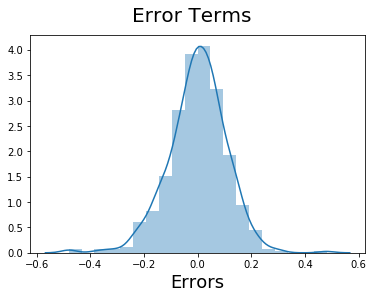

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

`We can see that the error terms are normally distributed, around zero.`

# Making Predictions

### Applying the scaling on the test set

In [77]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Mist,Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_f.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [82]:
X_test_new.head()

,const,yr,windspeed,spring,summer,winter,Sep,Tue,Mist,Rain
184,1.0,0,0.084219,0,0,0,0,0,1,0
535,1.0,1,0.153728,0,1,0,0,0,0,0
299,1.0,0,0.334206,0,0,1,0,0,1,0
221,1.0,0,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.537414,0,1,0,0,0,0,0


In [83]:
# Making predictions
y_pred = lr_final.predict(X_test_new)

## Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

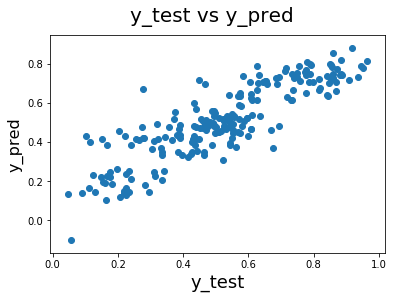

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading 
plt.xlabel('y_test', fontsize=18)              # X-label
plt.ylabel('y_pred', fontsize=16)              # Y-label

We can see that:
1. The scatter plot here, displays a Linear Relationship between y_test & y_pred.
2. There is no visible pattern which means that the error terms are independent of each other.
3. The variance does not seem to increase or decrease which represents Homoscedasticity.

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7482853326710994

We can see that r2 score evaluated on the test set is `0.748` and the r-squared value evaluated on the final train set above is `0.764` which is very close.
> **Hence, we can say that, what the model has learnt on the Training set, it is also able to generalize very well on the Test set.**

In [86]:
lr_final.params

const        0.585542
yr           0.247553
windspeed   -0.172406
spring      -0.298766
summer      -0.041739
winter      -0.075224
Sep          0.070392
Tue         -0.045648
Mist        -0.090668
Rain        -0.297428
dtype: float64


We can see that the equation of our best fitted line is:

$ cnt = 0.247  \times  yr - 0.172  \times  windspeed - 0.298 \times spring - 0.041 \times summer - 0.075 \times winter + 0.0703 \times Sep - 0.045 \times Tue - 0.0906 \times Mist - 0.297 \times Rain $


> Looking at the coefficients, we can say that, there is a huge decrease in the count of rented bikes during 'Rain'.